In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt

In [2]:

# main dataset from 2015 - 2019

df_2015 = pd.read_csv('./dataset/world_happiness/overall/2015.csv')
df_2015['year'] = '2015'
df_2016 = pd.read_csv('./dataset/world_happiness/overall/2016.csv')
df_2016['year'] = '2016'
df_2017 = pd.read_csv('./dataset/world_happiness/overall/2017.csv')
df_2017['year'] = '2017'
df_2018 = pd.read_csv('./dataset/world_happiness/overall/2018.csv')
df_2018['year'] = '2018'
df_2019 = pd.read_csv('./dataset/world_happiness/overall/2019.csv')
df_2019['year'] = '2019'

In [3]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [4]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
columns = []
columns.extend(df_2015.columns.to_list())
columns.extend(df_2016.columns.to_list())
columns.extend(df_2017.columns.to_list())
columns.extend(df_2018.columns.to_list())
columns.extend(df_2019.columns.to_list())

columns_set = set(columns)

print(columns_set)
print(len(columns_set))

{'Whisker.low', 'GDP per capita', 'Upper Confidence Interval', 'Happiness Rank', 'Region', 'Lower Confidence Interval', 'Country or region', 'Health..Life.Expectancy.', 'Standard Error', 'Economy..GDP.per.Capita.', 'Trust..Government.Corruption.', 'Overall rank', 'Family', 'Dystopia Residual', 'Freedom to make life choices', 'Whisker.high', 'Perceptions of corruption', 'Happiness.Score', 'Happiness Score', 'Freedom', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Country', 'Happiness.Rank', 'Healthy life expectancy', 'Generosity', 'year', 'Score', 'Trust (Government Corruption)', 'Social support', 'Dystopia.Residual'}
31


In [6]:
print(df_2019.columns)
print(df_2019['Score'].dtype)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')
float64


In [7]:
corr2019 = df_2019.corr()
corr2018 = df_2018.corr()
corr2017 = df_2017.corr()
corr2016 = df_2016.corr()
corr2015 = df_2015.corr()


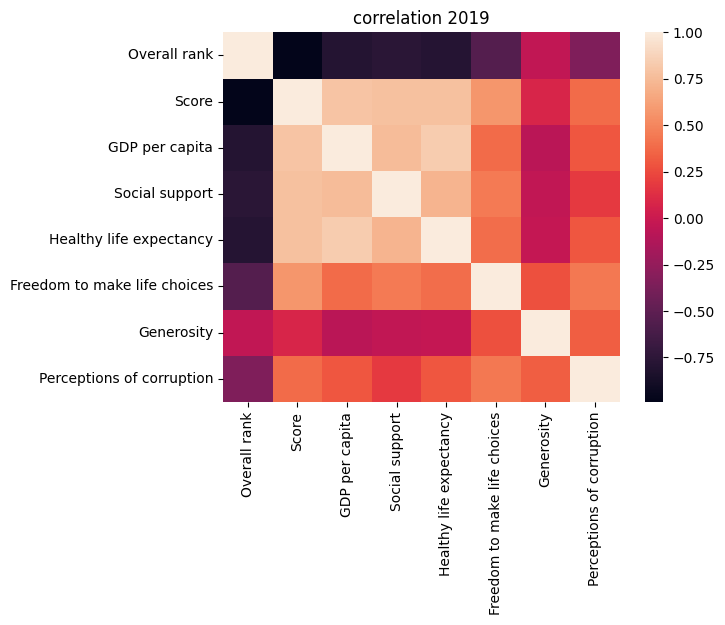

In [8]:
ax = plt.axes()
sns.heatmap(corr2019, ax=ax)
ax.set_title('correlation 2019')
plt.show()

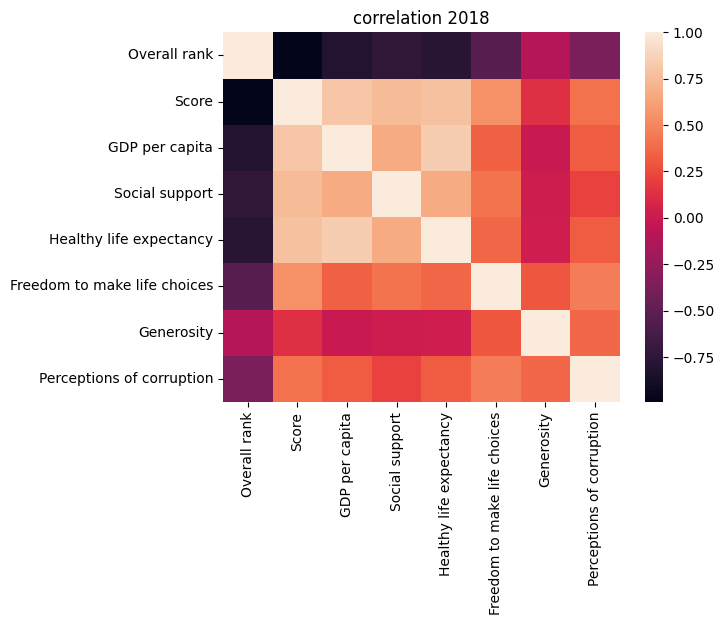

In [9]:
ax = plt.axes()
sns.heatmap(corr2018, ax=ax)
ax.set_title('correlation 2018')
plt.show()

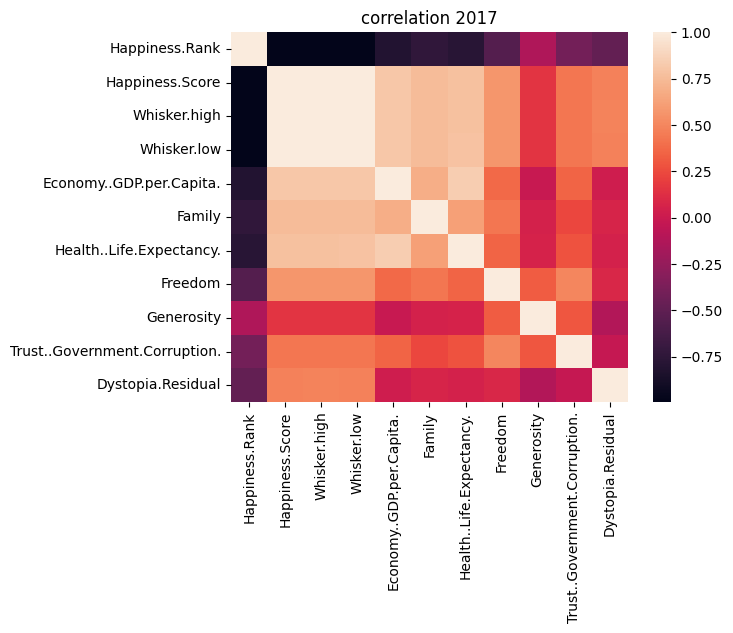

In [10]:
ax = plt.axes()
sns.heatmap(corr2017, ax=ax)
ax.set_title('correlation 2017')
plt.show()

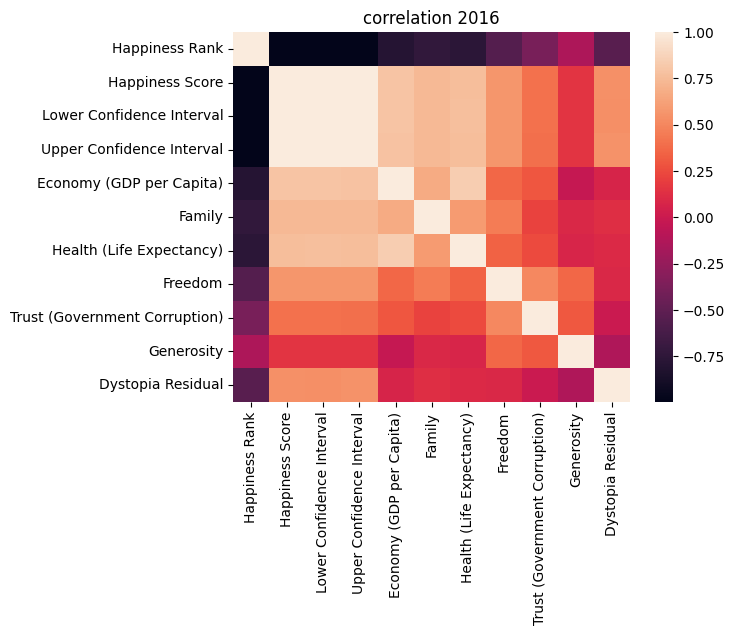

In [11]:
ax = plt.axes()
sns.heatmap(corr2016, ax=ax)
ax.set_title('correlation 2016')
plt.show()

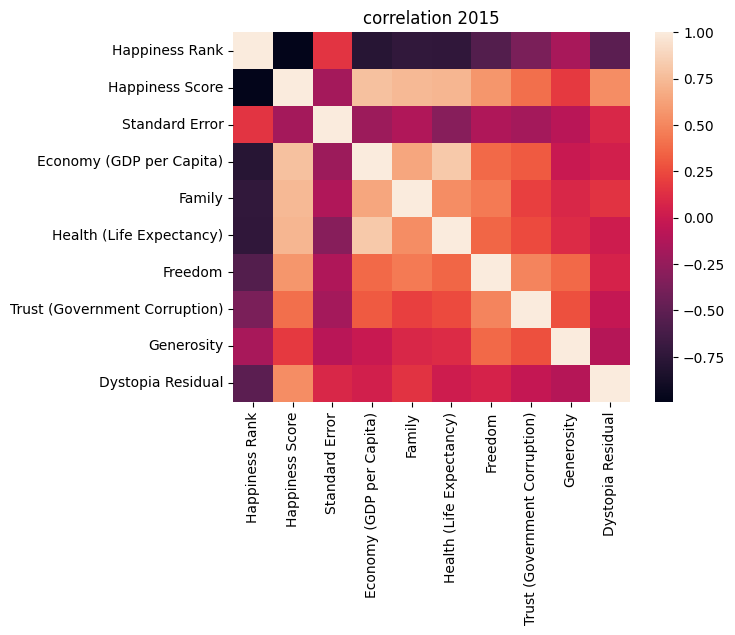

In [12]:
ax = plt.axes()
sns.heatmap(corr2015, ax=ax)
ax.set_title('correlation 2015')
plt.show()

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_2019_numeric = df_2019.select_dtypes(numerics)
df_2019_numeric_cols = df_2019_numeric.columns.drop('Score')

plots = []

for col in df_2019_numeric_cols:
    plots.append(
        alt.Chart(df_2019_numeric).mark_point().encode(
            y='Score',
            x=col
        )
    )

plots

nextRow = 3
s1 = plots
s2 = []
plot = None
print(len(s1))

# first = True
# while len(s1) > 1:
for i in range(0, len(s1)//nextRow + 1):
    for j in range(nextRow):
        if i*nextRow+j >= len(s1): 
            break

        if j == 0:
            plot = s1[i*nextRow+j]
        else:
            # if first:
            plot |= s1[i*nextRow+j]
            # else:
            #     plot &= s1[i*nextRow+j]
        
    s2.append(plot)

    # first = False
    # s1 = s2
    # print(s1)
    # print(s2)
    # s2 = []

# s1[0]
plot = None
for i in range(len(s2)):
    if i == 0:
        plot = s2[i]
    else:
        plot &= s2[i]

plot

7


alt.VConcatChart(...)

In [14]:
def plotOneYear(df: pd.DataFrame, y='Score', title=''):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric = df.select_dtypes(numerics)
    df_numeric_cols = df_numeric.columns.drop(y)

    plots = []

    for col in df_numeric_cols:
        plots.append(
            alt.Chart(df_numeric).mark_point().encode(
                y=y,
                x=col
            )
        )

    plots

    nextRow = 3
    s1 = plots
    s2 = []
    plot = None
    # print(len(s1))

    # first = True
    # while len(s1) > 1:
    for i in range(0, len(s1)//nextRow + 1):
        for j in range(nextRow):
            if i*nextRow+j >= len(s1): 
                break

            if j == 0:
                plot = s1[i*nextRow+j]
            else:
                # if first:
                plot |= s1[i*nextRow+j]
                # else:
                #     plot &= s1[i*nextRow+j]
            
        s2.append(plot)

        # first = False
        # s1 = s2
        # print(s1)
        # print(s2)
        # s2 = []

    # s1[0]
    plot = None
    for i in range(len(s2)):
        if i == 0:
            plot = s2[i]
        else:
            plot &= s2[i]

    plot = plot.properties(
        title=title
    )
    return plot, plots

In [15]:
p, ps = plotOneYear(df_2019, title='2019')
p

alt.VConcatChart(...)

In [16]:
p, ps = plotOneYear(df_2018, title='2018')
p

alt.VConcatChart(...)

In [17]:
print(df_2017.columns)

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year'],
      dtype='object')


In [18]:
df_2017.columns = df_2017.columns.str.replace('.', '_')
p, ps = plotOneYear(df_2017, 'Happiness_Score', title='2017')
p

/tmp/ipykernel_492043/2087496877.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2017.columns = df_2017.columns.str.replace('.', '_')


alt.VConcatChart(...)

In [19]:
print(df_2016.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')


In [20]:
p, ps = plotOneYear(df_2016, 'Happiness Score', title='2016')
p

alt.VConcatChart(...)

In [21]:
print(df_2015.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')


In [22]:
p, ps = plotOneYear(df_2015, 'Happiness Score', title='2015')
p

alt.VConcatChart(...)

In [23]:
import numpy as np
from sklearn import svm
from sklearn.cluster import KMeans

pd_without_score = df_2019_numeric.drop(['Score', 'Overall rank'], axis=1).dropna()
X = df_2019_numeric.drop(['Score', 'Overall rank'], axis=1).dropna().to_numpy()
print(X.shape)
pd_without_score.head()

(156, 6)


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [25]:
kmeans.cluster_centers_

array([[0.94867647, 1.27210294, 0.76611765, 0.38472059, 0.15623529,
        0.07127941],
       [0.39102273, 0.86186364, 0.41825   , 0.31372727, 0.20779545,
        0.09922727],
       [1.352     , 1.45795455, 0.96906818, 0.48354545, 0.20611364,
        0.18275   ]])

In [26]:
y = kmeans.predict(X)
result = pd.Series(y)

In [27]:
df_2019_numeric['Cluster'] = result

In [28]:
df_2019_numeric.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [29]:
alt.Chart(df_2019_numeric).encode(
    y='Score',
    x='GDP per capita',
    color='Cluster:N'
).mark_point()

alt.Chart(...)

In [30]:
alt.Chart(df_2019_numeric).encode(
    y='Score',
    x='Social support',
    color='Cluster:N'
).mark_point()

alt.Chart(...)

In [32]:
df_2019['Country or region']

0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object

In [33]:
import pycountry

In [34]:
pycountry.countries.search_fuzzy('Afghanistan')

[Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')]